<a href="https://colab.research.google.com/github/JMML2021/Entrega-projecte-final/blob/main/Calculo_Ryainair2019ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importar librerias:

import numpy as np
import matplotlib as plt
import pandas as pd
import csv
import seaborn as sns
import datetime
from datetime import timedelta

import matplotlib.pyplot as plt
 

In [3]:
path= '/content/drive/MyDrive/Ficheros de Vueling/2019RyanairCORTO.xlsx'
#path= '/content/drive/MyDrive/Ficheros de Vueling/2019Ryanair.xlsx'

In [4]:
# Abrir fichero de Github. 

Hoja = '2019Ryamair'
df = pd.read_excel(path, sheet_name=Hoja)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 8 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   Mes, Día, Año de Flight_Date_Calculated_TST  1007 non-null   object        
 1   scheduled_gate_departure                     1007 non-null   datetime64[ns]
 2   scheduled_gate_arrival                       1007 non-null   datetime64[ns]
 3   actual_gate_departure                        981 non-null    datetime64[ns]
 4   actual_gate_arrival                          990 non-null    datetime64[ns]
 5   tail_number                                  1007 non-null   object        
 6   departure_airport_id                         1007 non-null   object        
 7   arrival_at_cd_airport                        1003 non-null   object        
dtypes: datetime64[ns](4), object(4)
memory usage: 63.1+ KB


In [6]:
# Los nombre de las columnas tienen muchos espacios en blanco

nombreColumnas= df.columns
nombreColumnas

Index(['Mes, Día, Año de Flight_Date_Calculated_TST',
       'scheduled_gate_departure', 'scheduled_gate_arrival',
       'actual_gate_departure', 'actual_gate_arrival', 'tail_number',
       'departure_airport_id', 'arrival_at_cd_airport'],
      dtype='object')

In [7]:
# Aqui corrijo los nombre de las columnas
nombreColumnaCorregido= ['DATE', 'STD', 'STA', 'ATD','ATA', 'REG', 'DEP', 'ARR']
 
                         
# Proceso para cambiar el nombre de las columnas por un bucle FOR
for n, m in enumerate(nombreColumnas):
  print(n, m,'*',nombreColumnaCorregido[n],'-')
  df.rename({m: nombreColumnaCorregido[n]}, axis=1, inplace=True)

df.head()

0 Mes, Día, Año de Flight_Date_Calculated_TST * DATE -
1 scheduled_gate_departure * STD -
2 scheduled_gate_arrival * STA -
3 actual_gate_departure * ATD -
4 actual_gate_arrival * ATA -
5 tail_number * REG -
6 departure_airport_id * DEP -
7 arrival_at_cd_airport * ARR -


,DATE,STD,STA,ATD,ATA,REG,DEP,ARR
0,1 de abril de 2019,2019-04-01 10:30:00,2019-04-01 12:50:00,2019-04-01 10:43:00,2019-04-01 12:55:00,EI-DAC,MXP,OTP
1,1 de abril de 2019,2019-04-01 13:20:00,2019-04-01 15:45:00,2019-04-01 13:40:00,2019-04-01 16:03:00,EI-DAC,OTP,MXP
2,1 de abril de 2019,2019-04-01 16:10:00,2019-04-01 18:00:00,2019-04-01 16:40:00,2019-04-01 18:20:00,EI-DAC,MXP,PMO
3,1 de abril de 2019,2019-04-01 18:45:00,2019-04-01 20:35:00,2019-04-01 18:58:00,2019-04-01 20:35:00,EI-DAC,PMO,MXP
4,1 de abril de 2019,2019-04-01 05:30:00,2019-04-01 07:20:00,2019-04-01 05:30:00,2019-04-01 07:25:00,EI-DAD,OPO,BCN


In [8]:
df['MES'] = df['STD'].dt.month
df['Setmana'] = df['STD'].dt.week
df['DiaSetmana'] = df['STD'].dt.dayofweek
df['DiaSetmanaName'] = df['STD'].dt.day_name()
df['Hour'] = df['STD'].dt.hour
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


,DATE,STD,STA,ATD,ATA,REG,DEP,ARR,MES,Setmana,DiaSetmana,DiaSetmanaName,Hour
0,1 de abril de 2019,2019-04-01 10:30:00,2019-04-01 12:50:00,2019-04-01 10:43:00,2019-04-01 12:55:00,EI-DAC,MXP,OTP,4,14,0,Monday,10
1,1 de abril de 2019,2019-04-01 13:20:00,2019-04-01 15:45:00,2019-04-01 13:40:00,2019-04-01 16:03:00,EI-DAC,OTP,MXP,4,14,0,Monday,13
2,1 de abril de 2019,2019-04-01 16:10:00,2019-04-01 18:00:00,2019-04-01 16:40:00,2019-04-01 18:20:00,EI-DAC,MXP,PMO,4,14,0,Monday,16
3,1 de abril de 2019,2019-04-01 18:45:00,2019-04-01 20:35:00,2019-04-01 18:58:00,2019-04-01 20:35:00,EI-DAC,PMO,MXP,4,14,0,Monday,18
4,1 de abril de 2019,2019-04-01 05:30:00,2019-04-01 07:20:00,2019-04-01 05:30:00,2019-04-01 07:25:00,EI-DAD,OPO,BCN,4,14,0,Monday,5


In [10]:
# Calculo tiempo de vuelo teorico Real y error

df['DuracionVueloTeorico1']= (df['STA'] - df['STD'])/  np.timedelta64(1, 'm') 
df['DuracionVueloReal1'] = (df['ATA'] - df['ATD']) /  np.timedelta64(1, 'm') 
df['E_Duracion_Vuelo1']= df['DuracionVueloReal1']-df['DuracionVueloTeorico1']
df['E_Duracion_Vuelo1'].head(3)

media = round(df['E_Duracion_Vuelo1'].mean(),2)

print('\n\nError medio en tiempo de vuelo',media)



Error medio en tiempo de vuelo -6.15


In [11]:
#Calculo error arrivada:

df['E_Puntualidad1'] = (df['ATA']- df['STA']) /  np.timedelta64(1, 'm')

In [12]:
#Calculo error enlairament:
df['E_Despegue1'] = (df['ATD']- df['STD']) /  np.timedelta64(1, 'm')


In [13]:
df['Secuencia'] = df.groupby(['DATE', 'REG'])['STD'].rank()
print(df[['Secuencia','REG','STD', 'ARR']][5:19])

    Secuencia     REG                 STD  ARR
5         2.0  EI-DAD 2019-04-01 07:55:00  OPO
6         3.0  EI-DAD 2019-04-01 10:20:00  BRU
7         4.0  EI-DAD 2019-04-01 13:05:00  OPO
8         5.0  EI-DAD 2019-04-01 16:35:00  MXP
9         6.0  EI-DAD 2019-04-01 19:30:00  OPO
10        1.0  EI-DAE 2019-04-01 05:45:00  NRN
11        2.0  EI-DAE 2019-04-01 08:50:00  ALC
12        1.0  EI-DAF 2019-04-01 05:30:00  DUB
13        2.0  EI-DAF 2019-04-01 07:15:00  LTN
14        3.0  EI-DAF 2019-04-01 09:00:00  NOC
15        4.0  EI-DAF 2019-04-01 10:50:00  LTN
16        5.0  EI-DAF 2019-04-01 12:50:00  ORK
17        6.0  EI-DAF 2019-04-01 14:45:00  LTN
18        7.0  EI-DAF 2019-04-01 16:35:00  RMU


In [14]:
df1=df.copy()
df1.head()

,DATE,STD,STA,ATD,ATA,REG,DEP,ARR,MES,Setmana,DiaSetmana,DiaSetmanaName,Hour,DuracionVueloTeorico1,DuracionVueloReal1,E_Duracion_Vuelo1,E_Puntualidad1,E_Despegue1,Secuencia
0,1 de abril de 2019,2019-04-01 10:30:00,2019-04-01 12:50:00,2019-04-01 10:43:00,2019-04-01 12:55:00,EI-DAC,MXP,OTP,4,14,0,Monday,10,140.0,132.0,-8.0,5.0,13.0,1.0
1,1 de abril de 2019,2019-04-01 13:20:00,2019-04-01 15:45:00,2019-04-01 13:40:00,2019-04-01 16:03:00,EI-DAC,OTP,MXP,4,14,0,Monday,13,145.0,143.0,-2.0,18.0,20.0,2.0
2,1 de abril de 2019,2019-04-01 16:10:00,2019-04-01 18:00:00,2019-04-01 16:40:00,2019-04-01 18:20:00,EI-DAC,MXP,PMO,4,14,0,Monday,16,110.0,100.0,-10.0,20.0,30.0,3.0
3,1 de abril de 2019,2019-04-01 18:45:00,2019-04-01 20:35:00,2019-04-01 18:58:00,2019-04-01 20:35:00,EI-DAC,PMO,MXP,4,14,0,Monday,18,110.0,97.0,-13.0,0.0,13.0,4.0
4,1 de abril de 2019,2019-04-01 05:30:00,2019-04-01 07:20:00,2019-04-01 05:30:00,2019-04-01 07:25:00,EI-DAD,OPO,BCN,4,14,0,Monday,5,110.0,115.0,5.0,5.0,0.0,1.0


In [15]:
df1=df.copy()
df1.shape

(1007, 19)

In [16]:
AeropuertosCantidad = df1['ARR'].copy()
AeropuertosCantidad['cantitat'] = df1['ARR'].value_counts()
AeropuertosCantidad[1:3]

1    MXP
2    PMO
Name: ARR, dtype: object

In [17]:
AeropuertosCantidad = df1['ARR'].copy()
AeropuertosCantidad=pd.DataFrame(AeropuertosCantidad)
AeropuertosCantidad.columns=(['ARR'])
AeropuertosCantidad = df1['ARR'].value_counts()
AeropuertosCantidad.columns=[ 'ARR', 'Cantidad']
AeropuertosCantidad=pd.DataFrame(AeropuertosCantidad)
AeropuertosCantidad.columns

Index(['ARR'], dtype='object')

In [18]:
AeropuertosCantidad = df1['ARR']
AeropuertosCantidad

0       OTP
1       MXP
2       PMO
3       MXP
4       BCN
       ... 
1002    RMU
1003    PIK
1004    PMI
1005    DUS
1006    PMI
Name: ARR, Length: 1007, dtype: object

In [19]:
# Sapigue quants vols han sortit de cada aeroport 
AeropuertosCantidad = df1['ARR']
AeropuertosCantidad['cantitat'] = df1['ARR'].value_counts()

AeropuertosCantidad['cantitat'].sort_values
#AeropuertosCantidad=AeropuertosCantidad.sample(n=6, replace=True)
AeropuertosCantidad.columns=['Aeroport', 'cantitat']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [20]:
AeropuertosCantidad.shape

(1008,)

In [21]:
AeropuertosCantidad.head()

0    OTP
1    MXP
2    PMO
3    MXP
4    BCN
Name: ARR, dtype: object

In [22]:
# Filtre primer enlairament a BArcelona

vuelosPrimerDespegue= ((df1['Secuencia']== 1) & (df1['DEP']=='BCN'))
df2 = df1[vuelosPrimerDespegue]
print(df2[['DATE','REG', 'Secuencia','STD']][0:8])

                   DATE     REG  Secuencia                 STD
193  1 de abril de 2019  EI-DHF        1.0 2019-04-01 04:05:00
214  1 de abril de 2019  EI-DHR        1.0 2019-04-01 04:00:00
294  1 de abril de 2019  EI-DLJ        1.0 2019-04-01 04:15:00
528  1 de abril de 2019  EI-DWM        1.0 2019-04-01 04:20:00
774  1 de abril de 2019  EI-EBW        1.0 2019-04-01 06:40:00
947  1 de abril de 2019  EI-EKN        1.0 2019-04-01 06:30:00


Text(0.5, 0, 'Error (minuts)')

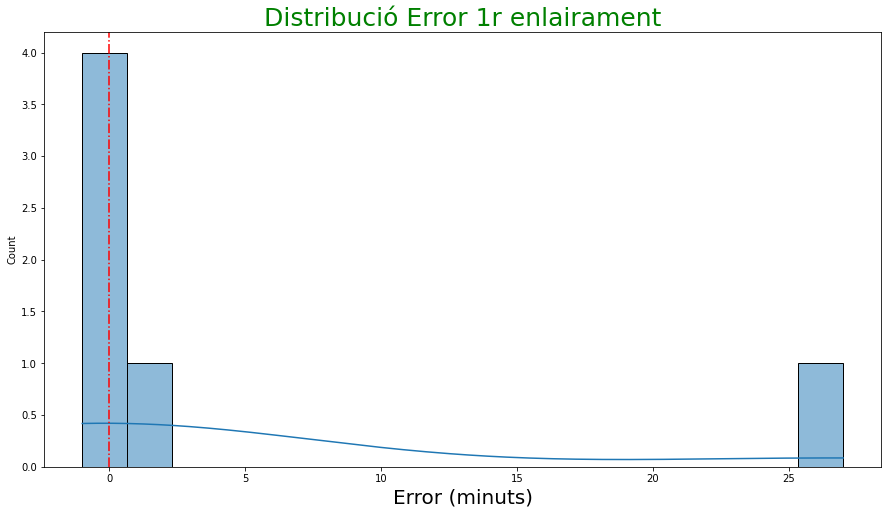

In [24]:
plt.figure(figsize = (15,8))
p= sns.histplot(data= df2.E_Despegue1, kde= True)
p.axvline(x = 0, ymin=0, ymax= 12, color='red', linestyle= 'dashdot') # Objetivo
p.set_title('Distribució Error 1r enlairament', fontsize=25, color='green')
p.set_xlabel("Error (minuts)", fontsize = 20)


Mitjana filtrada =  4.33 minuts


Text(0.5, 0, 'Error (minuts)')

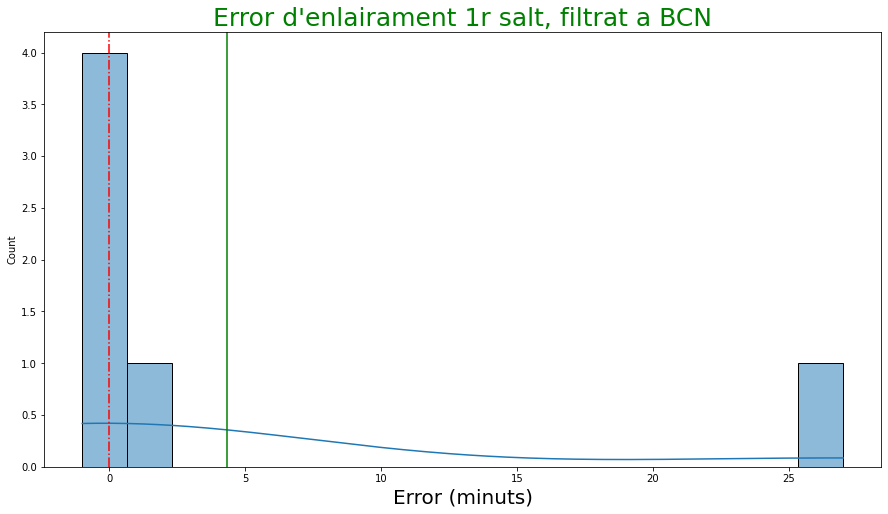

In [27]:
# Eliminar los outliers
df2=df2.copy()
dfEliminarOutliers= ((df2['Secuencia']== 1) & (df2['E_Despegue1']< 30) & (df2['E_Despegue1']> -30))

df2 = df2[dfEliminarOutliers]
#
plt.figure(figsize = (15,8))
p= sns.histplot(data= df2.E_Despegue1, kde= True)
p.set_title("Error d'enlairament 1r salt, filtrat a BCN", fontsize=25, color='green')
mediaFiltrada = round(df2['E_Despegue1'].mean(),2)
p.axvline(mediaFiltrada, 0,12, color = 'green')                       # Media real
p.axvline(x = 0, ymin=0, ymax= 12, color='red', linestyle= 'dashdot') # Objetivo
print()
print('Mitjana filtrada = ', mediaFiltrada, 'minuts')
#print(df2[['Secuencia', 'E_Despegue', 'AeropuertoKey1' ]]) 
p.set_xlabel("Error (minuts)", fontsize = 20)

KeyError: ignored

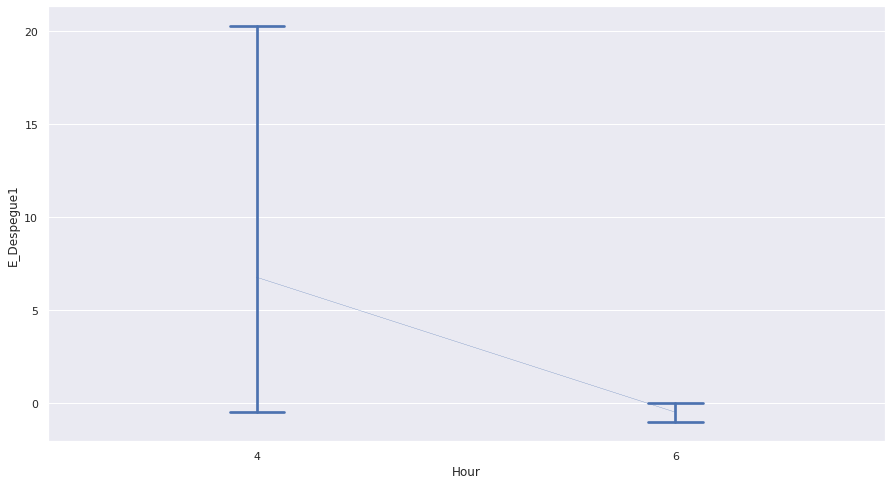

In [29]:
# Intervalos de Confianza por aeropuerto

sns.set_theme(style="darkgrid")
#tips = sns.df1("tips")
sns.set(rc = {'figure.figsize':(15,8)})      
# Tamaño de la imagen
ax = sns.pointplot(x='Hour', y = "E_Despegue1", data= df2, scale=.1, kind = "point", capsize=0.13)

puntualidadBCN = round((df2['E_Despegue'].mean()),2)#

ax.axhline(puntualidadBCN, color="red", linestyle = '--', label="ooas")       # Linea 0 verde
ax.axhline(0, color="green", linestyle = '--')


textoBCN = "BCN puntualitat mitja"+ str(puntualidadBCN) + ' minut.'
ax.text(puntualidadBCN ,puntualidadBCN , textoBCN, backgroundcolor='w')

ax.set_title('Puntualitat enlairament per hora del dia:', fontsize = 24, color= 'green')

In [ ]:
df1

In [ ]:
#Calculo error primer despegue despegue:


In [ ]:
df.head()

In [ ]:
plt.figure(figsize = (15,8))
p= sns.histplot(data= df.E_Puntualidad, kde= True)
p.axvline(x = 0, ymin=0, ymax= 12, color='red', linestyle= 'dashdot') # Objetivo
p.set_title('Distribució Error Puntualitat', fontsize=25, color='green')
p.set_xlabel("Error (minuts)", fontsize = 20)

In [ ]:
# Eliminar los outliers
df2=df.copy()
dfEliminarOutliers= ( (df2['E_Puntualidad']< 30) & (df2['E_Puntualidad']> -30))

df2 = df2[dfEliminarOutliers]
#
plt.figure(figsize = (15,8))
p= sns.histplot(data= df2.E_Puntualidad, kde= True)
p.set_title("Error de puntualidad", fontsize=25, color='green')

mediaFiltrada = round(df2['E_Puntualidad1'].mean(),2)
p.axvline(mediaFiltrada, 0,12, color = 'green')                       # Media real
p.axvline(x = 0, ymin=0, ymax= 12, color='red', linestyle= 'dashdot') # Objetivo
print()
print('Mitjana filtrada = ', mediaFiltrada, 'minuts')
#print(df2[['Secuencia', 'E_Despegue', 'AeropuertoKey1' ]]) 
p.set_xlabel("Error (minuts)", fontsize = 20)

In [ ]:
# Con los datos transformados veo si ha cambiado mucho la forma de cada variable
df1_StdScaler[df1_StdScaler.columns].hist(figsize=(18,10))

Text(0.5, 1.0, 'Puntualitat enlairament per hora del dia:')

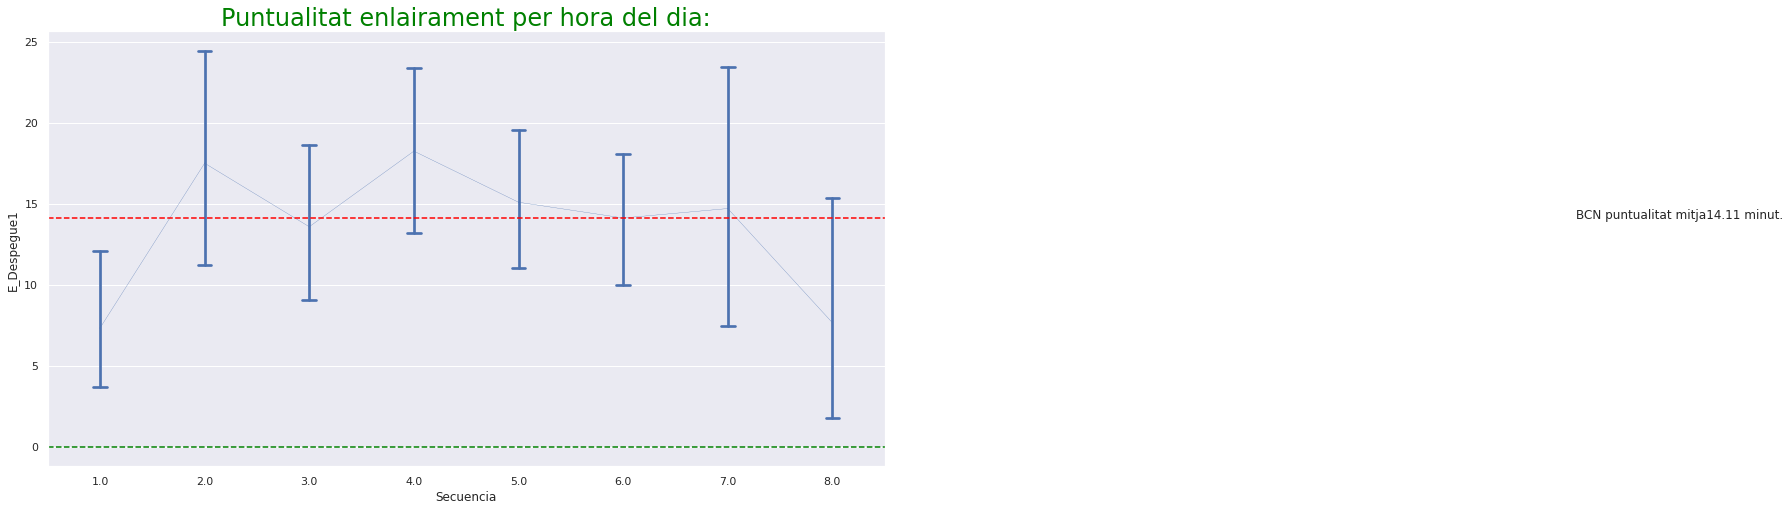

In [33]:
# Intervals de Confianza per salt

sns.set_theme(style="darkgrid")
#tips = sns.df1("tips")
sns.set(rc = {'figure.figsize':(15,8)})      
# Tamaño de la imagen
ax = sns.pointplot(x='Secuencia', y = "E_Despegue1", data= df, scale=.1, kind = "point", capsize=0.13)

puntualidadBCN = round((df['E_Despegue1'].mean()),2)#

ax.axhline(puntualidadBCN, color="red", linestyle = '--', label="ooas")       # Linea 0 verde
ax.axhline(0, color="green", linestyle = '--')


textoBCN = "BCN puntualitat mitja"+ str(puntualidadBCN) + ' minut.'
ax.text(puntualidadBCN ,puntualidadBCN , textoBCN, backgroundcolor='w')

ax.set_title('Puntualitat enlairament per salt del dia:', fontsize = 24, color= 'green')

#df['E_acumulado_Total'] = df[f'E_Despegue_Total'] + df[f'E_Duracion_Vuelo_Total'] + df[f'E_tierra_Total'] 